<a href="https://colab.research.google.com/github/YazhiniRaja27/Document-Clustering-with-TF-IDF-and-K-Means/blob/main/Document_Clustering_with_TF_IDF_and_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project demonstrates how to perform document clustering using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique and the K-Means clustering algorithm. It involves converting text documents into numerical representations, determining an optimal number of clusters using the elbow method, and then grouping similar documents together. The silhouette score is also calculated to evaluate the clustering quality.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [ ]:
documents = [
    "Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet and thoughtful, but showed signs of mental instability.",
    "As a young man, he worked as an art dealer, often travelling, but became depressed after he was transferred to London.",
    "He turned to religion and spent time as a missionary in southern Belgium.",
    "Later he drifted into ill-health and solitude.",
    "He was keenly aware of modernist trends in art and, while back with his parents, took up painting in 1881.",
    "His younger brother, Theo, supported him financially, and the two of them maintained a long correspondence.",
]


In [ ]:
# Convert the documents into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(documents)

# Check the shape of the matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (6, 52)


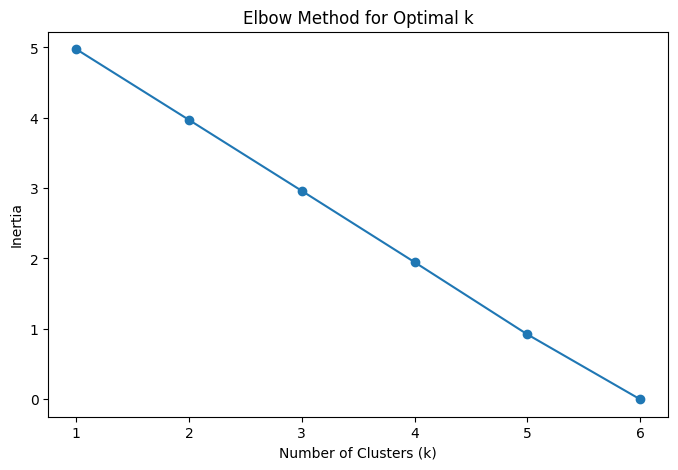

In [ ]:
# Use the elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, len(documents) + 1)  # Ensure k <= number of documents

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Set the optimal number of clusters based on the elbow method
optimal_k = 3  # Adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to each document
labels = kmeans.labels_

# Display the cluster labels
for i, doc in enumerate(documents):
    print(f"Document {i+1}: Cluster {labels[i]}")


Document 1: Cluster 2
Document 2: Cluster 1
Document 3: Cluster 0
Document 4: Cluster 1
Document 5: Cluster 1
Document 6: Cluster 1


In [ ]:
# Group documents by clusters
clusters = {i: [] for i in range(optimal_k)}
for i, label in enumerate(labels):
    clusters[label].append(documents[i])

# Display documents in each cluster
for cluster, docs in clusters.items():
    print(f"\nCluster {cluster}:")
    for doc in docs:
        print(f"- {doc}")



Cluster 0:
- He turned to religion and spent time as a missionary in southern Belgium.

Cluster 1:
- As a young man, he worked as an art dealer, often travelling, but became depressed after he was transferred to London.
- Later he drifted into ill-health and solitude.
- He was keenly aware of modernist trends in art and, while back with his parents, took up painting in 1881.
- His younger brother, Theo, supported him financially, and the two of them maintained a long correspondence.

Cluster 2:
- Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet and thoughtful, but showed signs of mental instability.


In [ ]:
score = silhouette_score(tfidf_matrix, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.004394445721339123
